### Imports

In [9]:
import numpy as np
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
import dimod
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
graph = nx.Graph()
graph.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 4), (3, 5), (5, 6), (2, 6)])

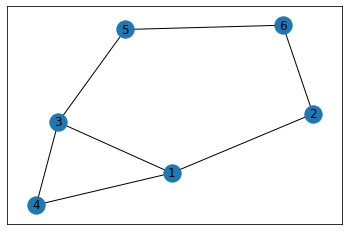

In [12]:
positioning = nx.spring_layout(graph)
nx.draw_networkx_nodes(graph, positioning)
nx.draw_networkx_edges(graph, positioning)
nx.draw_networkx_labels(graph, positioning)
plt.show()

In [10]:
h = defaultdict(int)
J = defaultdict(int)

In [11]:
for edge in graph.edges:
    J[edge] += 1

In [13]:
response = dimod.ExactSolver().sample_ising(h, J)

In [24]:
list(response.first.sample.values())

[1, -1, 1, -1, -1, 1]